# Reinforcement Learning Example 1



Here we defined a Reward Table with the row as the state of room to start with and column as the state of the room to end with. 

Each of the Row and Column will define a reward numbers to train the agent to reach the goal.

Example row 0 , column 3 , reward is 0 -> indicate the agent from room 0 enter room 3 and the reward is 0 since it a transition state.

Example row 0 , column 5 , reward is 100 -> indicate the agent from room 0 enter room 5 and the reward is 100 agent has reached goal state.

Example row 0 , column 1 , reward is -1 -> indicate the agent from room 0 enter room 1 and the reward is -1 Both room are not link it should not be encouraged so it set as negative value.

Set the Reward Table


```

R = np.matrix([ [-1,-1,-1,-1,0,-1],
								[-1,-1,-1,0,-1,100],
								[-1,-1,-1,0,-1,-1],
								[-1,0,0,-1,0,-1],
								[0,-1,-1,0,-1,100],
								[-1,0,-1,-1,0,100] ])

```


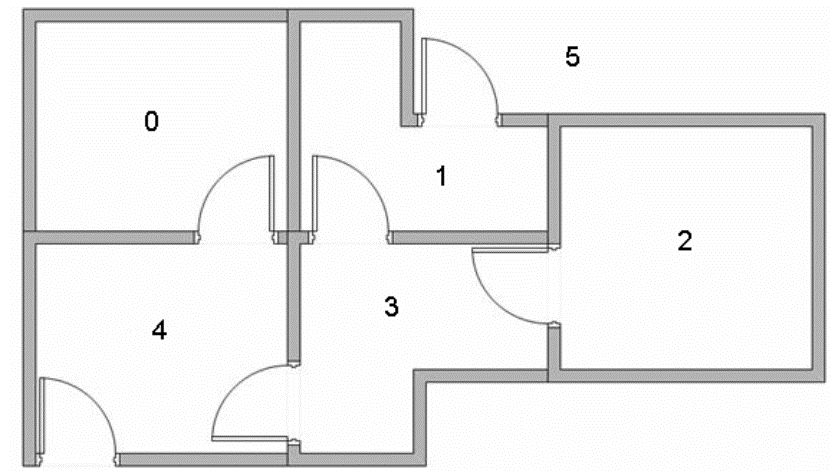



In [ ]:
import numpy as np

# Reward Table matrix
#Add code

The Q table format is similar to the reward table(Here we defined a Q Table with the row as the state of room to start with and column as the state of the room to end with.)

The agent transit from one state to another by taking an action to enter another room. The result of action will again a reward, it is calculated into Q values using the following equation.

Q[state, action] = Q[state, action] + lr * (reward + gamma * np.max(Q[new_state, :]) — Q[state, action])

We will intialise all values to zero to start with.



```
Q = np.matrix(np.zeros([6,6]))

```




In [ ]:
# Q Table matrix
#Add code

Gamma parameter.
Discount rate,determines the importance of future rewards



```
gamma = 0.8
```




In [ ]:
#Add code

For training to start with starting state.

you try different start state.


```
initial_state = 1
```



In [ ]:
# Initial state. (Usually to be chosen at random)
#Add code

In [ ]:
# This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # print(av_act)
    return av_act

# Get available actions in the current state
available_act = available_actions(initial_state) 


In [ ]:
# This function chooses at random which action to be performed within the range 
# of all the available actions.
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    # print(next_action)
    return next_action

# Sample next action to be performed
action = sample_next_action(available_act)


In [ ]:
# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    # print(max_index)

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    
    # Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value

# Update Q matrix
update(initial_state,action,gamma)

In [ ]:
# Training

print("Before training Q matrix:")
print(Q)

Before training Q matrix:
[[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]]


You set different iteration to do the training


In [ ]:
# Train over 10 000 iterations. (Re-iterate the process above).
for i in range(#Add code):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)
    
# Normalize the "trained" Q matrix
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

After complete the reinforcement training. 

A update Q table will be used by the agent to do the live navigation in the environment.

In the environment that we have the goal state is 5.

Try to set different current state and get the navigation path.


In [ ]:
# Testing-Agent interact with environment

# Goal state = 5
# Best sequence path starting from 2 -> 2, 3, 1, 5

current_state = 2
steps = [current_state]


while current_state != 5:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

# Print selected sequence of steps
print("Selected path:")
print(steps)


Selected path:
[2, 5]
